# 📊 CodeLogic Data Analysis Report

This report analyzes 100 AI-generated prompts and responses related to coding and math help. The goal is to explore patterns in question types, response lengths, and topic clusters.

In [107]:
import pandas as pd

df = pd.read_csv("ai_test_data.csv")
df.head()

,question,response
0,What is a for loop in Python?,Great question! A for loop in Python is used t...
1,How do you solve a quadratic equation?,Solving a quadratic equation typically involve...
2,Explain recursion with an example in Java.,Let's try working through it step by step inst...
3,What's the difference between a list and a tup...,"In Python, a list is mutable, which means you ..."
4,How do you integrate x^2?,To integrate \( x^2 \) with respect to \( x \)...


In [108]:
df.info()

print(f"Total questions: {len(df)}")
print(f"Unique questions: {df['question'].nunique()}")

df['response_length'] = df['response'].apply(lambda x: len(x.split()))
df['question_length'] = df['question'].apply(lambda x: len(x.split()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  100 non-null    object
 1   response  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB
Total questions: 100
Unique questions: 100


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['question'])

kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
df['cluster'] = kmeans.labels_
top_questions = df.groupby('cluster')['question'].apply(lambda x: x.mode()[0]).reset_index()
top_questions.columns = ['cluster', 'top_question']

In [110]:
cluster_labels = {
    0: "Calculus / Pre-Calculus",
    1: "Programming + Advanced Math",
    2: "Geometry / Math Reasoning",
    3: "Algebra & Equations",
    4: "Python Concepts + Functions",
    5: "Algebraic Simplification",
    6: "Data Structures / Recursion",
    7: "Trigonometry"
}

df['topic'] = df['cluster'].map(cluster_labels)
for cluster, label in cluster_labels.items():
    print(f"\nCluster {cluster} - {label}")
    sample_prompts = df[df['cluster'] == cluster]['question'].sample(min(3, len(df[df['cluster'] == cluster])), random_state=42)
    for i, q in enumerate(sample_prompts, 1):
        print(f"{i}. {q}")


Cluster 0 - Calculus / Pre-Calculus
1. What is the derivative of ln(x)?
2. Find the integral of 3x^2 + 4x - 7
3. What is the slope of the line passing through points (2, 3) and (5, 9)?

Cluster 1 - Programming + Advanced Math
1. Explain recursion with an example in Java.
2. What is Big-O notation?
3. How do you find the derivative of sin(x)? Can you give an example?

Cluster 2 - Geometry / Math Reasoning
1. What is the area of a sector with central angle 60° in a circle of radius 10?
2. Calculate the diagonal of a square with side length 10 cm
3. How do you calculate the area of a triangle?

Cluster 3 - Algebra & Equations
1. Find the equation of a line with slope 2 passing through point (1, 3)
2. How do you solve a quadratic equation?
3. Solve the exponential equation: 3^(x+1) = 27

Cluster 4 - Python Concepts + Functions
1. How do you serialize an object in Python?
2. What is a for loop in Python?
3. Find the range of the function f(x) = x^2 - 4x + 3

Cluster 5 - Algebraic Simplific

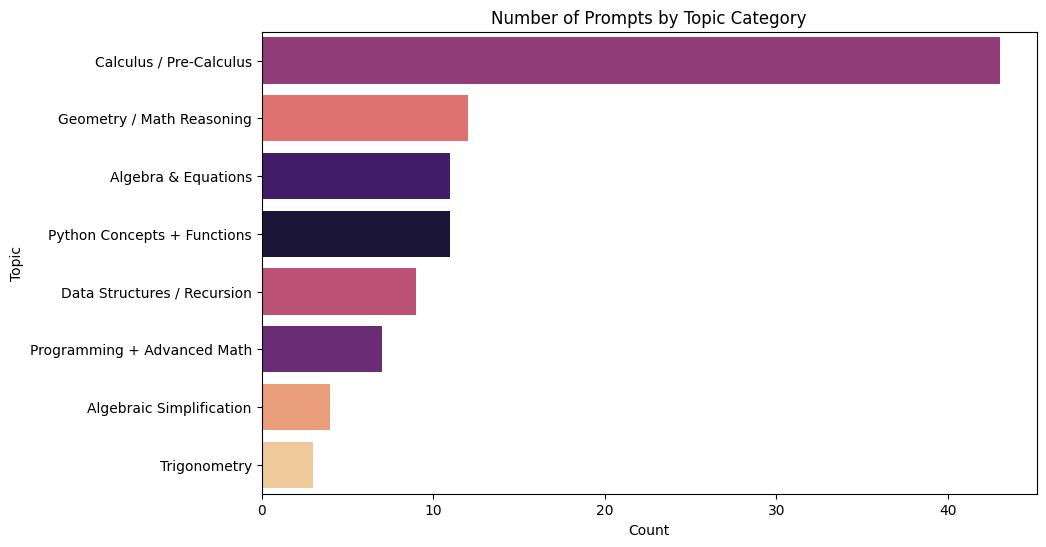

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y='topic',
    order=df['topic'].value_counts().index,
    hue='topic',
    palette='magma',
    legend=False
)
plt.title("Number of Prompts by Topic Category")
plt.xlabel("Count")
plt.ylabel("Topic")
plt.show()


### Number of Prompts by Topic Category

This bar chart displays the number of prompts assigned to each topic after clustering and labeling.

#### Observations:

- **Calculus / Pre-Calculus** is the most common topic by far, with the highest number of prompts.
- **Trigonometry** appears the least, indicating it was the least frequently asked about area in this dataset.
- Topics related to **programming** — including *Python Concepts + Functions*, *Programming + Advanced Math*, and *Data Structures / Recursion* — make up a large portion of the middle categories, suggesting strong representation of computer science topics alongside math.

#### Interpretation:

This distribution highlights a strong user interest in calculus-related questions, while more niche or specific topics like trigonometry are less represented. The balanced spread of programming topics also suggests that the dataset reflects a diverse mix of math and coding queries.


In [112]:
longest = df.loc[df['response_length'].idxmax()]
shortest = df.loc[df['response_length'].idxmin()]

print("\n📏 Longest Response:")
print(f"Q: {longest['question']}\nA: {longest['response'][:500]}...")

print("\n🪶 Shortest Response:")
print(f"Q: {shortest['question']}\nA: {shortest['response']}")


📏 Longest Response:
Q: How do you implement a stack using an array?
A: To implement a stack using an array, you can use the following steps:
1. Create an array to store the elements of the stack and initialize a variable to keep track of the top of the stack.
2. When pushing an element onto the stack, increment the top index and insert the element into the array at that index.
3. When popping an element from the stack, retrieve the element at the top index and decrement the top index.
4. Ensure to handle stack overflow (when trying to push onto a full stack) and st...

🪶 Shortest Response:
Q: Explain recursion with an example in Java.
A: Let's try working through it step by step instead. What have you tried so far?


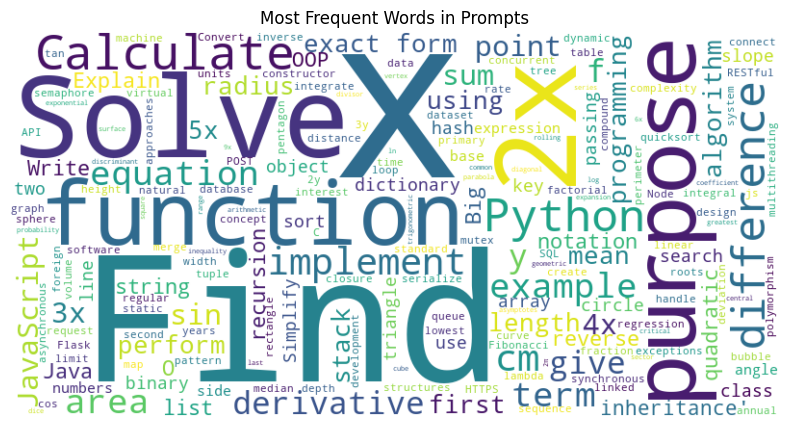

In [113]:
from wordcloud import WordCloud

prompt_text = " ".join(df['question'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(prompt_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Prompts")
plt.show()

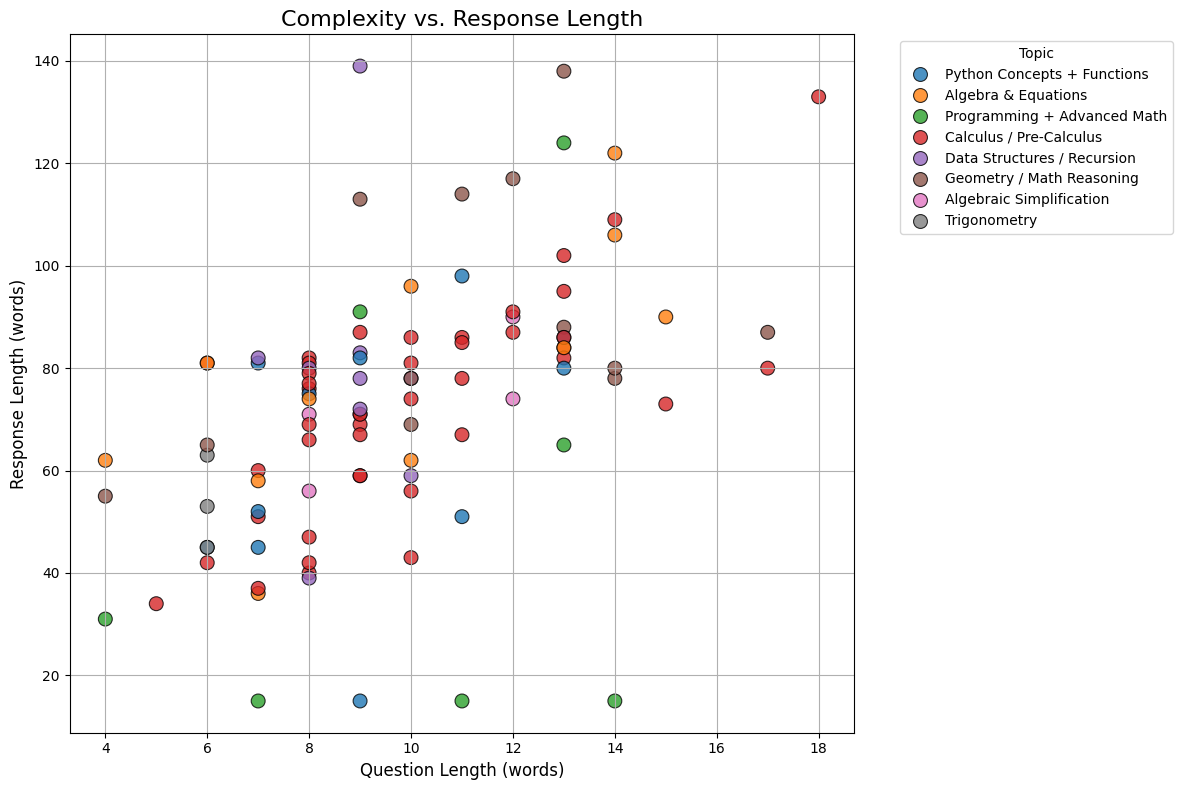

In [114]:
plt.figure(figsize=(12, 8))  # Bigger size
sns.scatterplot(
    data=df,
    x='question_length',
    y='response_length',
    hue='topic',
    palette='tab10',
    s=100,  # Make dots larger
    edgecolor='black',  # Improve visibility
    alpha=0.8  # Slight transparency
)
plt.title("Complexity vs. Response Length", fontsize=16)
plt.xlabel("Question Length (words)", fontsize=12)
plt.ylabel("Response Length (words)", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Topic')
plt.grid(True)
plt.tight_layout()
plt.show()


### Complexity vs. Response Length

This scatter plot shows the relationship between the **length of a prompt (question)** and the **length of its corresponding AI-generated response**, measured in word counts.

#### Key Observations:

- There is a **clear upward trend**, indicating that **longer or more complex questions tend to receive longer responses**.
- While there is some variation across topics, the overall pattern holds consistently, suggesting that the model adapts its response length based on the complexity or depth of the prompt.
- Topics such as *Programming + Advanced Math* and *Data Structures / Recursion* generally have both longer questions and longer responses, likely due to their conceptual depth.

#### Interpretation:

This relationship supports the idea that the AI is contextually sensitive—providing more detail when questions are more elaborate. It also reflects natural language use, where more detailed prompts require more comprehensive explanations.


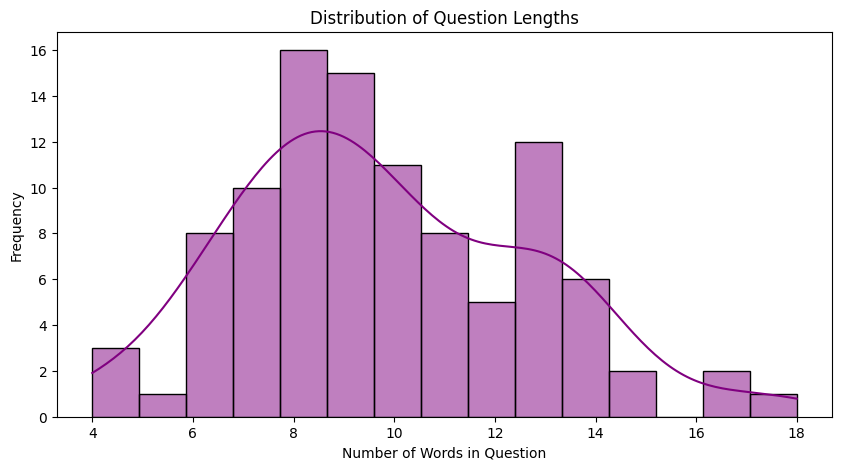

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [115]:
# Histogram of question lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['question_length'], bins=15, kde=True, color='purple')
plt.title("Distribution of Question Lengths")
plt.xlabel("Number of Words in Question")
plt.ylabel("Frequency")
plt.show()
# Fit the vectorizer to the questions
vectorizer.fit(df['question']) 

### Distribution of Question Lengths

This histogram shows the frequency of prompts based on their word count.

#### Observations:

- The distribution rises quickly, with the **most common question length peaking at 9 words**, where it reaches a frequency of 12.
- After the peak, the frequency **gradually decreases** up to around 13 words.
- Beyond 13 words, the drop becomes **steeper**, and the distribution **levels off** near 18 words.
  
#### Interpretation:

This suggests that most users tend to ask **short, concise questions**, typically under 14 words. Very long prompts are relatively rare, indicating that the AI is often queried with focused or narrowly scoped questions.


In [116]:
# Fit the vectorizer to the questions
vectorizer.fit(df['question'])

# Ensure the variable 'df' is used from the notebook
top_n = 5
feature_names = vectorizer.get_feature_names_out()
for topic in df['topic'].unique():
    sub_texts = df[df['topic'] == topic]['question']
    sub_X = vectorizer.transform(sub_texts)
    mean_scores = sub_X.mean(axis=0).A1
    top_words = [feature_names[i] for i in mean_scores.argsort()[-top_n:][::-1]]
    print(f"\n🧠 Top words for '{topic}':", top_words)



🧠 Top words for 'Python Concepts + Functions': ['function', 'python', '2x', 'loop', 'dictionary']

🧠 Top words for 'Algebra & Equations': ['solve', 'equation', '2x', 'quadratic', '32']

🧠 Top words for 'Programming + Advanced Math': ['example', 'big', 'notation', 'dictionary', 'sin']

🧠 Top words for 'Calculus / Pre-Calculus': ['purpose', 'difference', '4x', 'points', 'perform']

🧠 Top words for 'Data Structures / Recursion': ['implement', 'using', 'binary', 'stack', 'array']

🧠 Top words for 'Geometry / Math Reasoning': ['calculate', 'cm', 'area', '10', 'length']

🧠 Top words for 'Algebraic Simplification': ['2x', 'simplify', '3x', '5x', 'derivative']

🧠 Top words for 'Trigonometry': ['exact', 'form', '30', 'tan', 'cos']


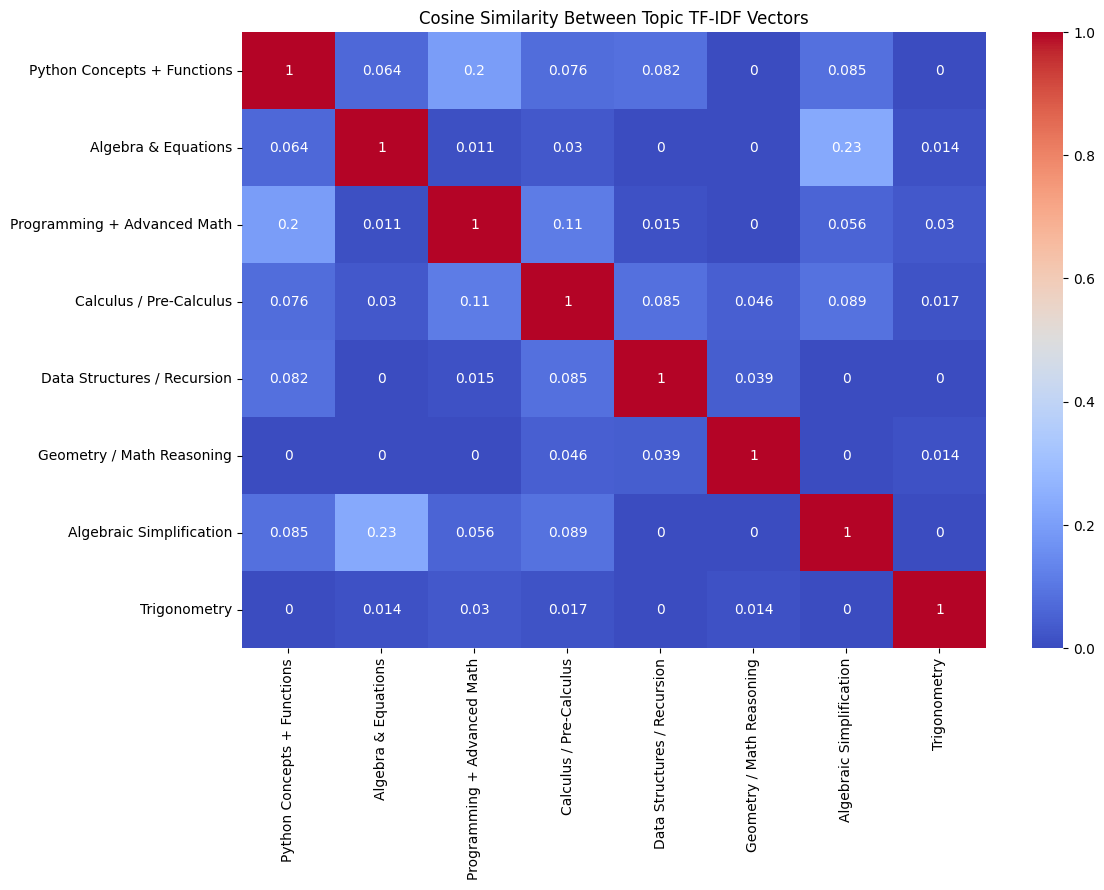

In [117]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

topic_vectors = []
topics = []

for topic in df['topic'].unique():
    sub_X = vectorizer.transform(df[df['topic'] == topic]['question'])
    centroid = sub_X.mean(axis=0).A1  # Convert matrix to 1D array
    topic_vectors.append(centroid)
    topics.append(topic)

similarity_matrix = cosine_similarity(topic_vectors)

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(similarity_matrix, xticklabels=topics, yticklabels=topics, annot=True, cmap="coolwarm")
plt.title("Cosine Similarity Between Topic TF-IDF Vectors")
plt.show()


## This heatmap shows the cosine similarity between average TF-IDF vectors of questions within each topic category. It helps identify how lexically similar the topics are based on their word usage.
### Similar Topics
- "Algebra & Equations" and "Algebraic Simplification" show the strongest cross-topic similarity (0.23), suggesting overlapping terminology (e.g., expressions, variables).
- "Programming + Advanced Math" and "Python Concepts + Functions" have moderate similarity (0.20), which makes sense due to shared Python-related language.
### Least Similar Topics
- "Geometry / Math Reasoning" and "Trigonometry" have almost zero similarity with most others, indicating they use distinct vocabulary.
- "Data Structures / Recursion" also shows low similarity across the board, highlighting its uniqueness among primarily math-focused topics.